In [23]:
# Dependencies and Setup
import pandas as pd
import requests
import json
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from pprint import pprint

In [8]:
# # Open JSON data
# with open('../../datasets/_players_all_data.json') as json_file:
#     data = json.load(json_file)

## Read into data

In [26]:
# Read csv
all_players = pd.read_csv('../../datasets/ASG_train.csv') 
all_stars = all_players.loc[all_players['Selected?'] == 1]
all_players.head(10)

,Year,Avg. Pace,PLAYER,TEAM,Team Conference Rank,GP,Team GP,W,PTS,REB,...,BLK,TOV,TS%,3PM,DEFWS,USG%,PIE,Prior ASG Appearances,AS Last Year?,Selected?
0,1996,90.1,Michael Jordan,CHI,1,40,40,35,30.9,5.8,...,0.5,1.7,56.4,1.2,0.004,33.6,19.8,10,1,1
1,1996,90.1,Shaquille O'Neal,LAL,3,40,41,28,26.2,13.2,...,3.1,3.1,55.7,0.0,0.003,30.4,18.4,4,1,1
2,1996,90.1,Latrell Sprewell,GSW,7,39,39,16,25.9,4.9,...,0.8,4.0,57.1,2.2,0.001,28.2,14.5,2,0,1
3,1996,90.1,Karl Malone,UTA,4,40,40,27,25.8,10.8,...,0.7,3.1,57.6,0.0,0.003,31.5,20.8,9,1,1
4,1996,90.1,Hakeem Olajuwon,HOU,1,37,41,28,24.1,9.4,...,2.2,3.7,54.8,0.1,0.003,32.2,16.3,11,1,1
5,1996,90.1,Mitch Richmond,SAC,8,40,40,16,24.1,3.9,...,0.3,2.8,56.0,1.8,0.002,28.4,14.3,4,1,1
6,1996,90.1,Glen Rice,CHH,6,37,40,21,24.0,4.2,...,0.4,2.2,57.8,2.5,0.002,25.4,11.3,1,1,1
7,1996,90.1,Allen Iverson,PHI,15,34,39,7,22.8,4.5,...,0.4,4.9,50.3,2.2,0.000,29.0,10.3,0,0,0
8,1996,90.1,Vin Baker,MIL,10,36,39,18,22.4,10.7,...,1.4,3.6,56.2,0.2,0.003,26.9,14.2,2,1,1
9,1996,90.1,Gary Payton,SEA,2,40,40,29,22.2,4.4,...,0.1,2.5,55.1,1.4,0.004,26.0,15.6,3,1,1


In [29]:
all_players.columns

Index(['Year', 'Avg. Pace', 'PLAYER', 'TEAM', 'Team Conference Rank', 'GP',
       'Team GP', 'W', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TS%', '3PM',
       'DEFWS', 'USG%', 'PIE', 'Prior ASG Appearances', 'AS Last Year?',
       'Selected?'],
      dtype='object')

## Setup target and feature names

In [28]:
target = all_players['Selected?']
target_names = ['no', 'yes']

In [74]:
data = all_players.drop(['Selected?', 'Year', 'Avg. Pace', 'PLAYER', 'TEAM', 'AS Last Year?'], axis=1)
feature_names = data.columns

feature_names
# [['Team Conference Rank', 'GP', 'W', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'TS%', '3PM', 'DEFWS', 'USG%', 'PIE', 'Prior ASG Appearances']]

Index(['Team Conference Rank', 'GP', 'Team GP', 'W', 'PTS', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'TS%', '3PM', 'DEFWS', 'USG%', 'PIE',
       'Prior ASG Appearances'],
      dtype='object')

## Decision Tree Classifier

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [69]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9595664860358483

[Text(181.02708333333337, 209.6742857142857, 'X[4] <= 18.45\ngini = 0.112\nsamples = 7196\nvalue = [6769, 427]'),
 Text(90.51354166666668, 194.14285714285714, 'X[14] <= 13.35\ngini = 0.031\nsamples = 6656\nvalue = [6551, 105]'),
 Text(47.98541666666667, 178.61142857142858, 'X[15] <= 4.5\ngini = 0.012\nsamples = 6270\nvalue = [6232, 38]'),
 Text(16.920833333333334, 163.07999999999998, 'X[8] <= 3.65\ngini = 0.007\nsamples = 6147\nvalue = [6124, 23]'),
 Text(14.854166666666668, 147.54857142857142, 'X[14] <= 11.05\ngini = 0.007\nsamples = 6146\nvalue = [6124, 22]'),
 Text(4.133333333333334, 132.01714285714286, 'X[8] <= 1.75\ngini = 0.0\nsamples = 5391\nvalue = [5390, 1]'),
 Text(2.066666666666667, 116.48571428571428, 'gini = 0.0\nsamples = 5322\nvalue = [5322, 0]'),
 Text(6.200000000000001, 116.48571428571428, 'X[9] <= 2.55\ngini = 0.029\nsamples = 69\nvalue = [68, 1]'),
 Text(4.133333333333334, 100.9542857142857, 'gini = 0.0\nsamples = 68\nvalue = [68, 0]'),
 Text(8.266666666666667, 100.9

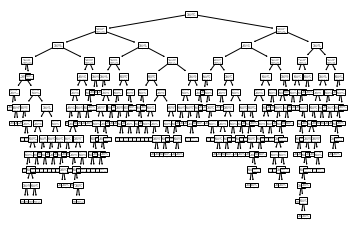

In [70]:
tree.plot_tree(clf)

In [71]:
import graphviz 

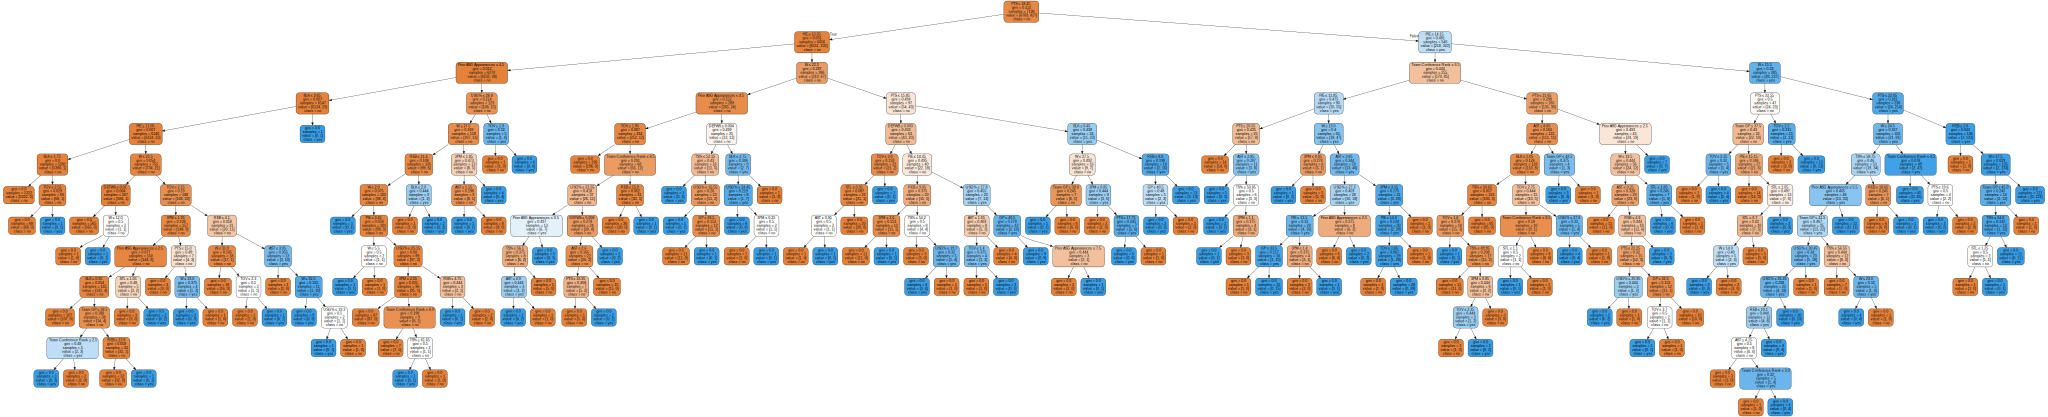

In [76]:
dot_data = tree.export_graphviz(clf, out_file=None, 
...                      feature_names=feature_names,  
...                      class_names=target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9749895789912464

In [43]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.25011762387175596, 'PTS'),
 (0.15787167950886838, 'PIE'),
 (0.08820193703204117, 'USG%'),
 (0.08357560061086962, 'Prior ASG Appearances'),
 (0.0670470042531896, 'W'),
 (0.05645282623768686, 'TOV'),
 (0.043720595195685885, 'AST'),
 (0.043183214137727834, 'REB'),
 (0.04007328364933324, 'Team Conference Rank'),
 (0.029088281344083068, 'BLK'),
 (0.02726397488699411, 'TS%'),
 (0.026129626817152172, 'DEFWS'),
 (0.025913751182914963, 'GP'),
 (0.024999495755191024, 'STL'),
 (0.01996334494108769, '3PM'),
 (0.016397760575418453, 'Team GP')]

## Setup Decision Tree for D3

In [79]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

In [80]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(data, target)

rules(clf, feature_names, target_names)

{'name': 'PTS > 18.449999809265137',
 'children': [{'name': 'PIE > 14.25',
   'children': [{'name': 'W > 19.5',
     'children': [{'name': '18 of no, 239 of yes'},
      {'name': '43 of no, 67 of yes'}]},
    {'name': 'Team Conference Rank > 6.5',
     'children': [{'name': '193 of no, 40 of yes'},
      {'name': '48 of no, 74 of yes'}]}]},
  {'name': 'PIE > 12.949999809265137',
   'children': [{'name': 'Prior ASG Appearances > 0.5',
     'children': [{'name': '113 of no, 74 of yes'},
      {'name': '446 of no, 29 of yes'}]},
    {'name': 'PTS > 16.050000190734863',
     'children': [{'name': '263 of no, 24 of yes'},
      {'name': '7901 of no, 23 of yes'}]}]}]}

In [82]:
import json

r = rules(clf, feature_names, target_names)
with open('rules.json', 'w') as f:
    f.write(json.dumps(r))